<a href="https://colab.research.google.com/github/busrayildirim0/breast_cancer_DNN/blob/main/MemeKanseri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Remove the 'id' column
data_cleaned = data.drop(columns=['id'])

# Encode the 'diagnosis' column (M = 1, B = 0)
label_encoder = LabelEncoder()
data_cleaned['diagnosis'] = label_encoder.fit_transform(data_cleaned['diagnosis'])

# Separate features and target
X = data_cleaned.drop(columns=['diagnosis'])
y = data_cleaned['diagnosis']

# Standardize the features (normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

In [5]:
pip install tensorflow


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model oluşturdum
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(30,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary sınıflandırma için
])

# Modeli derledim
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğittim
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Test seti üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6764 - loss: 0.6341 - val_accuracy: 0.8901 - val_loss: 0.4247
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9392 - loss: 0.3916 - val_accuracy: 0.9341 - val_loss: 0.2690
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9663 - loss: 0.2339 - val_accuracy: 0.9341 - val_loss: 0.1892
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9619 - loss: 0.1661 - val_accuracy: 0.9451 - val_loss: 0.1465
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9881 - loss: 0.0985 - val_accuracy: 0.9560 - val_loss: 0.1206
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9897 - loss: 0.0702 - val_accuracy: 0.9451 - val_loss: 0.1069
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9790 - loss: 0.0869 - val_accuracy: 0.9560 - val_loss: 0.0969
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9841 - loss: 0.0708 - val_accuracy: 0.9560 - val_loss

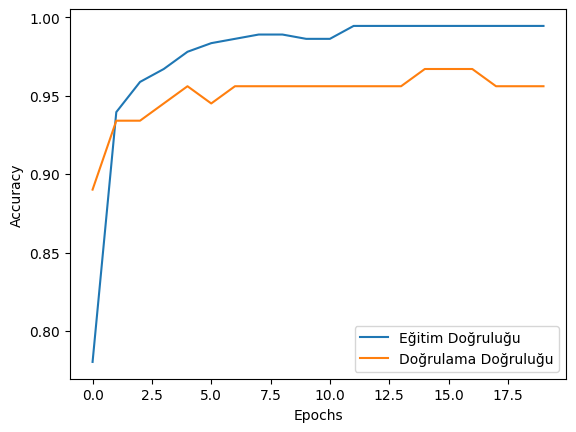

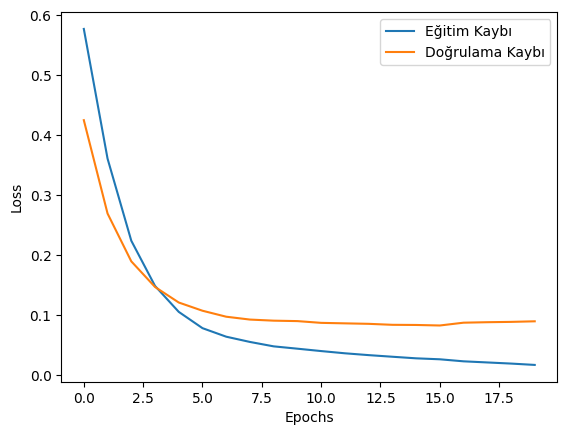

In [7]:
# Eğitim süreci doğruluğu ve kayıp grafiklerini çizdirme
def plot_training_history(history):
    # Eğitim ve doğrulama doğruluğu
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Eğitim ve doğrulama kaybı
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)


In [8]:
# Test verilerinden birkaç örnekte tahmin yapma
predictions = model.predict(X_test[:5])

# Tahmin sonuçlarını orijinal etiketlerle karşılaştırma
for i, pred in enumerate(predictions):
    print(f"Gerçek değer: {y_test.iloc[i]}, Tahmin edilen değer: {np.round(pred[0])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Gerçek değer: 0, Tahmin edilen değer: 0.0
Gerçek değer: 1, Tahmin edilen değer: 1.0
Gerçek değer: 1, Tahmin edilen değer: 1.0
Gerçek değer: 0, Tahmin edilen değer: 0.0
Gerçek değer: 0, Tahmin edilen değer: 0.0


In [11]:
model.save('my_model.keras')
